<a href="https://colab.research.google.com/github/LAUROJAS3/Seminario_RN/blob/main/LRC_P03_04_AND_%26_OR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#AND GATE

data = [ [ 0, 0],
         [ 0, 1],
         [ 1, 0],
         [ 1, 1] ]
target = [0,
          0,
          0,
          1 ]

In [ ]:
print ("Data:", data)
print ("target", target)

Data: [[0, 0], [0, 1], [1, 0], [1, 1]]
target [0, 0, 0, 1]


In [ ]:
from tabulate import tabulate

w1 = 0.9
w2 = 0.9
b = 0.9

lr = 0.5

itreations= 3

data_out = [ ]
weigths = [ ]
weigths.append( [w1, w2, b])

for epoch in range ( itreations):
  for x,y in zip (data, target):
    yin = w1*x[0] + w2*x[1] + b

    #función de activación
    if ( yin >= 0.5  ):
      yin = 1
    else:
      yin = 0

    e = y-yin

    if int(y) != int(yin):
      w1 = w1 + lr*e*x[0]
      w2 = w2 + lr*e*x[1]
      b = b + lr*e

      #store the update weights
      weigths.append( [w1,w2, b])

    data_out.append( [epoch, x[0], yin, y, y, e, '-', w1,w2,b, int(y) != int(yin)] )

  data_out.append (['-','-','-','-','-','-','-','-','-','-'])

print(tabulate ( data_out,
                 headers=['Epoch', 'x1', 'x2', 'yin', 'y', 't', 'e','-', 'w1', 'w2','b', 'update']))

Epoch    x1    x2    yin    y    t    e    -    w1    w2                    b
-------  ----  ----  -----  ---  ---  ---  ---  ----  --------------------  -----
0        0     1     0      0    -1   -    0.9  0.9   0.4                   True
0        0     1     0      0    -1   -    0.9  0.4   -0.09999999999999998  True
0        1     1     0      0    -1   -    0.4  0.4   -0.6                  True
0        1     0     1      1    1    -    0.9  0.9   -0.09999999999999998  True
-        -     -     -      -    -    -    -    -     -
1        0     0     0      0    0    -    0.9  0.9   -0.09999999999999998  False
1        0     1     0      0    -1   -    0.9  0.4   -0.6                  True
1        1     0     0      0    0    -    0.9  0.4   -0.6                  False
1        1     1     1      1    0    -    0.9  0.4   -0.6                  False
-        -     -     -      -    -    -    -    -     -
2        0     0     0      0    0    -    0.9  0.4   -0.6                  F

[0.9, 0.9, 0.9]
[0.9, 0.9, 0.4]
[0.9, 0.4, -0.09999999999999998]
[0.4, 0.4, -0.6]
[0.9, 0.9, -0.09999999999999998]
[0.9, 0.4, -0.6]


<Figure size 640x480 with 0 Axes>

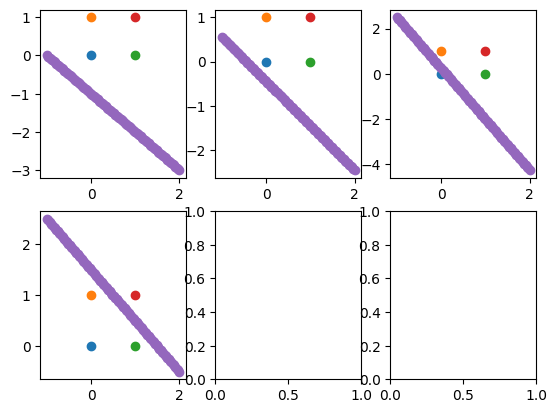

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a,b,c = w1,w2,b

data_arr = np.array( data )

x_min = min( data_arr[: ,0 ]-1)
x_max = max( data_arr[: ,0 ]+1)

x = np.linspace(x_min, x_max, 100)


pairs = []

for ws in weigths:
  it = []
  for xi in  x :
    y = (-ws[2] -ws[0]*xi) /ws[1];
    it.append( [xi,y])

  pairs.append(it)
  print(ws)

data_arr = np.array( data )
data_arr_x = data_arr [ : , 0 ]
data_arr_y = data_arr [ : , 1 ]

pairs = np.array(pairs)

plt.figure(1)

fig, axis = plt.subplots(2, 3)

for idx,idy in zip ( data_arr_x, data_arr_y  ):
    axis[0,0].scatter(idx, idy )
    axis[0,1].scatter(idx, idy )
    axis[0,2].scatter(idx, idy )
    axis[1,0].scatter(idx, idy )

axis[0,0].scatter(pairs[0,: ,0], pairs[0, :,1] )
axis[0,1].scatter(pairs[1,: ,0], pairs[1, :,1]  )
axis[0,2].scatter(pairs[2,: ,0], pairs[2, :,1]  )
axis[1,0].scatter(pairs[3,: ,0], pairs[3, :,1]  )

In [ ]:
#OR GATE
data = [[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]

target = [0,
          1,
          1,
          1]

In [ ]:
print("Data:", data)
print("Target:", target)

Data: [[0, 0], [0, 1], [1, 0], [1, 1]]
Target: [0, 1, 1, 1]


In [ ]:
from tabulate import tabulate

w1 = 0.5
w2 = 0.5
b = 0.5

lr = 0.5
iterations = 10

data_out = []
weights = [[w1, w2, b]]

for epoch in range(iterations):
    for x, y in zip(data, target):
        yin = w1 * x[0] + w2 * x[1] + b

        # Función de activación
        yout = 1 if yin >= 0.5 else 0

        e = y - yout

        if y != yout:  # Actualización de pesos
            w1 += lr * e * x[0]
            w2 += lr * e * x[1]
            b += lr * e

            # Guardar los pesos actualizados
            weights.append([w1, w2, b])

        data_out.append([epoch, x[0], x[1], yin, yout, y, e, w1, w2, b, y != yout])

    data_out.append(['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-'])

print(tabulate(data_out, headers=['Epoch', 'x1', 'x2', 'yin', 'y', 't', 'e', 'w1', 'w2', 'b', 'update']))

Epoch    x1    x2    yin    y    t    e    w1    w2    b    update
-------  ----  ----  -----  ---  ---  ---  ----  ----  ---  --------
0        0     0     0.5    1    0    -1   0.5   0.5   0.0  True
0        0     1     0.5    1    1    0    0.5   0.5   0.0  False
0        1     0     0.5    1    1    0    0.5   0.5   0.0  False
0        1     1     1.0    1    1    0    0.5   0.5   0.0  False
-        -     -     -      -    -    -    -     -     -    -
1        0     0     0.0    0    0    0    0.5   0.5   0.0  False
1        0     1     0.5    1    1    0    0.5   0.5   0.0  False
1        1     0     0.5    1    1    0    0.5   0.5   0.0  False
1        1     1     1.0    1    1    0    0.5   0.5   0.0  False
-        -     -     -      -    -    -    -     -     -    -
2        0     0     0.0    0    0    0    0.5   0.5   0.0  False
2        0     1     0.5    1    1    0    0.5   0.5   0.0  False
2        1     0     0.5    1    1    0    0.5   0.5   0.0  False
2        1     

<Figure size 640x480 with 0 Axes>

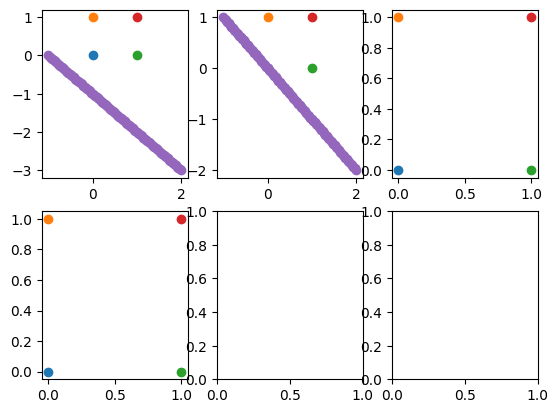

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a,b,c = w1,w2,b

data_arr = np.array(data)
x_min = min(data_arr[:, 0]) - 1
x_max = max(data_arr[:, 0]) + 1
x = np.linspace(x_min, x_max, 100)
pairs = []

for ws in weights:
    it = [[xi, (-ws[2] - ws[0] * xi) / ws[1]] for xi in x]
    pairs.append(it)

data_arr_x = data_arr[:, 0]
data_arr_y = data_arr[:, 1]
pairs = np.array(pairs, dtype=object)

plt.figure(1)
fig, axis = plt.subplots(2, 3)

for idx, idy in zip(data_arr_x, data_arr_y):
    axis[0, 0].scatter(idx, idy)
    axis[0, 1].scatter(idx, idy)
    axis[0, 2].scatter(idx, idy)
    axis[1, 0].scatter(idx, idy)

if len(pairs) > 0:
    axis[0, 0].scatter(pairs[0, :, 0], pairs[0, :, 1])
if len(pairs) > 1:
    axis[0, 1].scatter(pairs[1, :, 0], pairs[1, :, 1])